In [1]:
import os
import numpy as np
import collections
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
os.getcwd()

'/Users/luizaadelinaciucu/Work/ATLAS/TrackML'

In [3]:
def p(name,nparray):
    print(nparray)
    print(name,nparray.shape,type(nparray))
# done function

In [4]:
outputFolder="/Users/luizaadelinaciucu/Work/ATLAS/TrackMLtest/output"

In [5]:
nparray_InputTrain=np.load(outputFolder+"/NN_2_data_InputTrain_000000099.npy")
nparray_InputTest=np.load(outputFolder+"/NN_2_data_InputTest_000000099.npy")
nparray_OutputTrain=np.load(outputFolder+"/NN_2_data_OutputTrain_000000099.npy")
nparray_OutputTest=np.load(outputFolder+"/NN_2_data_OutputTest_000000099.npy")

In [6]:
p("InputTrain",nparray_InputTrain)

[[[   70.7608 ]
  [    7.70057]
  [-1502.5    ]
  ...
  [   34.332  ]
  [    1.88716]
  [ -697.5    ]]

 [[   46.6472 ]
  [    2.94397]
  [-1102.5    ]
  ...
  [   45.6353 ]
  [    3.55546]
  [-1097.5    ]]

 [[   36.3365 ]
  [    4.18884]
  [-1502.5    ]
  ...
  [   33.1648 ]
  [    4.34046]
  [-1302.5    ]]

 ...

 [[ -879.336  ]
  [  195.535  ]
  [ 1225.5    ]
  ...
  [ -111.476  ]
  [   28.5214 ]
  [  169.403  ]]

 [[ -928.183  ]
  [   83.586  ]
  [ 1222.5    ]
  ...
  [ -960.459  ]
  [   67.4609 ]
  [ 1222.5    ]]

 [[ -960.459  ]
  [   67.4609 ]
  [ 1222.5    ]
  ...
  [ -115.813  ]
  [   10.4317 ]
  [  143.195  ]]]
InputTrain (14561, 60, 1) <class 'numpy.ndarray'>


In [7]:
p("InputTest",nparray_InputTest)

[[[   79.9859 ]
  [   11.3613 ]
  [-1498.     ]
  ...
  [   42.7101 ]
  [    5.90873]
  [ -818.     ]]

 [[   63.7141 ]
  [    4.03639]
  [-1502.5    ]
  ...
  [   45.8633 ]
  [    3.58444]
  [-1102.5    ]]

 [[   96.2093 ]
  [   13.9164 ]
  [-1502.5    ]
  ...
  [   58.3467 ]
  [    8.42881]
  [ -962.5    ]]

 ...

 [[ -956.498  ]
  [  235.053  ]
  [ 1225.5    ]
  ...
  [ -110.736  ]
  [   33.0466 ]
  [  147.366  ]]

 [[-1002.     ]
  [   69.7137 ]
  [ 1222.5    ]
  ...
  [ -358.412  ]
  [   32.3191 ]
  [  431.593  ]]

 [[ -894.392  ]
  [  123.784  ]
  [ 1222.5    ]
  ...
  [ -659.084  ]
  [   59.3951 ]
  [  865.4    ]]]
InputTest (14561, 60, 1) <class 'numpy.ndarray'>


In [8]:
p ("OutputTrain", nparray_OutputTrain)


[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1. -1.  1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ...  1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
OutputTrain (14561, 20) <class 'numpy.ndarray'>


In [9]:
p ("OutputTest",nparray_OutputTest)

[[-1. -1. -1. ...  1. -1.  1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
OutputTest (14561, 20) <class 'numpy.ndarray'>


Acum vom pregati un NN

Create the model

In [10]:
np.random.seed(98383822)
import keras
nrNodesInputLayer=nparray_InputTrain.shape[1] # three inputs (x, y, z) for each hit in the batch
nrNodesOutputLayer=nparray_OutputTrain.shape[1] # one output for each hit in the batch


Using TensorFlow backend.


In [11]:
def get_model_01():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 




In [12]:
def get_model_02():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [13]:
def get_model_03():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [14]:
def get_model_04():
    
    # nr nodes on the hidden layers
    k=2
    nrNodesHiddenLayer=nrNodesOutputLayer*k

    # create empty model
    model=keras.models.Sequential()

    # add first layer 
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))

    # flatten first layer
    model.add(keras.layers.Flatten())

    # add hidden layers
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))

    # add output layer
    model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))

    # model geometry done

    # choosing how the NN learns 
    # learning method squared hinge; optimizer Adadelta
    model.compile(loss=keras.losses.squared_hinge,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

   # now model is done we are ready to train 
    return model
# done function 


In [15]:
model_01=get_model_01()
model_02=get_model_02()
model_03=get_model_03()
model_04=get_model_04()

In [16]:
numberOfEpochs=230
batchSize=500

In [17]:
def train_model(model):
    history=model.fit(
            nparray_InputTrain,
            nparray_OutputTrain,
            batchSize,numberOfEpochs,
            validation_data=(nparray_InputTest,nparray_OutputTest),
            shuffle=False
            )
    nparray_accuracy_Train=history.history["accuracy"]
    nparray_accuracy_Test=history.history["val_accuracy"]
    nparray_loss_Train=history.history["loss"]
    nparray_loss_Test=history.history["val_loss"]

    # ready to return
    return (model,nparray_accuracy_Train,nparray_accuracy_Test,nparray_loss_Train,nparray_loss_Test)
# done function

In [18]:
model_01,nparray_accuracy_Train_01,nparray_accuracy_Test_01,nparray_loss_Train_01,nparray_loss_Test_01=train_model(model_01)
model_02,nparray_accuracy_Train_02,nparray_accuracy_Test_02,nparray_loss_Train_02,nparray_loss_Test_02=train_model(model_02)
model_03,nparray_accuracy_Train_03,nparray_accuracy_Test_03,nparray_loss_Train_03,nparray_loss_Test_03=train_model(model_03)
model_04,nparray_accuracy_Train_04,nparray_accuracy_Test_04,nparray_loss_Train_04,nparray_loss_Test_04=train_model(model_04)

Train on 14561 samples, validate on 14561 samples
Epoch 1/230
14561/14561 [==============================] - 1s 90us/step - loss: 0.9553 - accuracy: 0.1302 - val_loss: 0.8983 - val_accuracy: 0.2621
Epoch 2/230
14561/14561 [==============================] - 1s 97us/step - loss: 0.8927 - accuracy: 0.1204 - val_loss: 0.8695 - val_accuracy: 0.1637
Epoch 3/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.8423 - accuracy: 0.2801 - val_loss: 0.8201 - val_accuracy: 0.2672
Epoch 4/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.7967 - accuracy: 0.2322 - val_loss: 0.7749 - val_accuracy: 0.3073
Epoch 5/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.7800 - accuracy: 0.2347 - val_loss: 0.7891 - val_accuracy: 0.2470
Epoch 6/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.7784 - accuracy: 0.2535 - val_loss: 0.7734 - val_accuracy: 0.2726
Epoch 7/230
14561/14561 [==============================] - 1s 

Epoch 56/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7199 - accuracy: 0.1666 - val_loss: 0.7261 - val_accuracy: 0.2405
Epoch 57/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7236 - accuracy: 0.2403 - val_loss: 0.7235 - val_accuracy: 0.1722
Epoch 58/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7270 - accuracy: 0.1844 - val_loss: 0.7200 - val_accuracy: 0.2324
Epoch 59/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7161 - accuracy: 0.2132 - val_loss: 0.7258 - val_accuracy: 0.1556
Epoch 60/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7216 - accuracy: 0.1588 - val_loss: 0.7193 - val_accuracy: 0.1500
Epoch 61/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7197 - accuracy: 0.1591 - val_loss: 0.7298 - val_accuracy: 0.1642
Epoch 62/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7197 - accuracy: 0.1674

Epoch 111/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7085 - accuracy: 0.3083 - val_loss: 0.7104 - val_accuracy: 0.3057
Epoch 112/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7150 - accuracy: 0.2882 - val_loss: 0.7140 - val_accuracy: 0.2179
Epoch 113/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7117 - accuracy: 0.2101 - val_loss: 0.7090 - val_accuracy: 0.2468
Epoch 114/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7069 - accuracy: 0.2522 - val_loss: 0.7063 - val_accuracy: 0.2685
Epoch 115/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7043 - accuracy: 0.2408 - val_loss: 0.7104 - val_accuracy: 0.1854
Epoch 116/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7062 - accuracy: 0.1922 - val_loss: 0.7094 - val_accuracy: 0.2359
Epoch 117/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7035 - accuracy:

14561/14561 [==============================] - 1s 53us/step - loss: 0.7069 - accuracy: 0.1871 - val_loss: 0.7125 - val_accuracy: 0.2042
Epoch 166/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7082 - accuracy: 0.2354 - val_loss: 0.7127 - val_accuracy: 0.2326
Epoch 167/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.7079 - accuracy: 0.2537 - val_loss: 0.7076 - val_accuracy: 0.2852
Epoch 168/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6998 - accuracy: 0.2872 - val_loss: 0.7019 - val_accuracy: 0.2944
Epoch 169/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6998 - accuracy: 0.3003 - val_loss: 0.7030 - val_accuracy: 0.2910
Epoch 170/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.7003 - accuracy: 0.2652 - val_loss: 0.7062 - val_accuracy: 0.2459
Epoch 171/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7008 - accuracy: 0.2498 - val_

Epoch 220/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6852 - accuracy: 0.2781 - val_loss: 0.6961 - val_accuracy: 0.2735
Epoch 221/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6951 - accuracy: 0.2713 - val_loss: 0.6942 - val_accuracy: 0.3040
Epoch 222/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6858 - accuracy: 0.2987 - val_loss: 0.6897 - val_accuracy: 0.3006
Epoch 223/230
14561/14561 [==============================] - 1s 53us/step - loss: 0.6855 - accuracy: 0.3112 - val_loss: 0.6938 - val_accuracy: 0.3131
Epoch 224/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6883 - accuracy: 0.2925 - val_loss: 0.6900 - val_accuracy: 0.2928
Epoch 225/230
14561/14561 [==============================] - 1s 50us/step - loss: 0.6877 - accuracy: 0.2930 - val_loss: 0.6933 - val_accuracy: 0.3122
Epoch 226/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6867 - accuracy:

14561/14561 [==============================] - 1s 52us/step - loss: 0.7232 - accuracy: 0.3505 - val_loss: 0.7398 - val_accuracy: 0.3923
Epoch 45/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7282 - accuracy: 0.3672 - val_loss: 0.7319 - val_accuracy: 0.3769
Epoch 46/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7247 - accuracy: 0.3187 - val_loss: 0.7295 - val_accuracy: 0.3176
Epoch 47/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7251 - accuracy: 0.2724 - val_loss: 0.7227 - val_accuracy: 0.2711
Epoch 48/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7177 - accuracy: 0.2316 - val_loss: 0.7312 - val_accuracy: 0.1569
Epoch 49/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7239 - accuracy: 0.2116 - val_loss: 0.7238 - val_accuracy: 0.2279
Epoch 50/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7218 - accuracy: 0.1998 - val_loss: 

14561/14561 [==============================] - 1s 52us/step - loss: 0.7077 - accuracy: 0.2443 - val_loss: 0.7130 - val_accuracy: 0.2560
Epoch 100/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7051 - accuracy: 0.2357 - val_loss: 0.7162 - val_accuracy: 0.1739
Epoch 101/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7064 - accuracy: 0.2347 - val_loss: 0.7112 - val_accuracy: 0.2631
Epoch 102/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.7084 - accuracy: 0.2573 - val_loss: 0.7160 - val_accuracy: 0.2195
Epoch 103/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7073 - accuracy: 0.2308 - val_loss: 0.7095 - val_accuracy: 0.2476
Epoch 104/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.7060 - accuracy: 0.2340 - val_loss: 0.7095 - val_accuracy: 0.2478
Epoch 105/230
14561/14561 [==============================] - 1s 55us/step - loss: 0.7048 - accuracy: 0.2470 - val_

Epoch 154/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6945 - accuracy: 0.2423 - val_loss: 0.7005 - val_accuracy: 0.2178
Epoch 155/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6907 - accuracy: 0.2385 - val_loss: 0.6951 - val_accuracy: 0.2668
Epoch 156/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6853 - accuracy: 0.2737 - val_loss: 0.6936 - val_accuracy: 0.3294
Epoch 157/230
14561/14561 [==============================] - 1s 51us/step - loss: 0.6913 - accuracy: 0.3075 - val_loss: 0.6998 - val_accuracy: 0.3456
Epoch 158/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6946 - accuracy: 0.3329 - val_loss: 0.6978 - val_accuracy: 0.2918
Epoch 159/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6930 - accuracy: 0.2380 - val_loss: 0.6969 - val_accuracy: 0.2474
Epoch 160/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6945 - accuracy:

14561/14561 [==============================] - 1s 52us/step - loss: 0.6890 - accuracy: 0.2447 - val_loss: 0.6961 - val_accuracy: 0.2362
Epoch 209/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6896 - accuracy: 0.2800 - val_loss: 0.6920 - val_accuracy: 0.2527
Epoch 210/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6862 - accuracy: 0.2635 - val_loss: 0.6908 - val_accuracy: 0.2668
Epoch 211/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6847 - accuracy: 0.2559 - val_loss: 0.6963 - val_accuracy: 0.2628
Epoch 212/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6894 - accuracy: 0.2674 - val_loss: 0.6964 - val_accuracy: 0.2474
Epoch 213/230
14561/14561 [==============================] - 1s 52us/step - loss: 0.6917 - accuracy: 0.2531 - val_loss: 0.7005 - val_accuracy: 0.1871
Epoch 214/230
14561/14561 [==============================] - 1s 54us/step - loss: 0.6963 - accuracy: 0.1790 - val_

14561/14561 [==============================] - 1s 51us/step - loss: 1.4594 - accuracy: 0.1776 - val_loss: 1.4637 - val_accuracy: 0.1773
Epoch 33/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.4598 - accuracy: 0.2009 - val_loss: 1.4690 - val_accuracy: 0.2251
Epoch 34/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.4726 - accuracy: 0.1599 - val_loss: 1.4668 - val_accuracy: 0.1436
Epoch 35/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.4677 - accuracy: 0.1967 - val_loss: 1.4693 - val_accuracy: 0.2277
Epoch 36/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.4547 - accuracy: 0.1841 - val_loss: 1.4644 - val_accuracy: 0.2081
Epoch 37/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.4596 - accuracy: 0.1409 - val_loss: 1.4671 - val_accuracy: 0.1122
Epoch 38/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.4689 - accuracy: 0.0998 - val_loss: 

14561/14561 [==============================] - 1s 49us/step - loss: 1.4148 - accuracy: 0.1191 - val_loss: 1.4176 - val_accuracy: 0.1195
Epoch 88/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.4098 - accuracy: 0.1191 - val_loss: 1.4055 - val_accuracy: 0.1605
Epoch 89/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.4063 - accuracy: 0.1526 - val_loss: 1.4142 - val_accuracy: 0.2064
Epoch 90/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.4095 - accuracy: 0.1948 - val_loss: 1.4104 - val_accuracy: 0.1870
Epoch 91/230
14561/14561 [==============================] - 1s 54us/step - loss: 1.4130 - accuracy: 0.1911 - val_loss: 1.4090 - val_accuracy: 0.1944
Epoch 92/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.4054 - accuracy: 0.2083 - val_loss: 1.4148 - val_accuracy: 0.2213
Epoch 93/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.4171 - accuracy: 0.2069 - val_loss: 

Epoch 142/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3758 - accuracy: 0.2628 - val_loss: 1.3722 - val_accuracy: 0.2811
Epoch 143/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.3773 - accuracy: 0.2369 - val_loss: 1.3880 - val_accuracy: 0.2229
Epoch 144/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.3746 - accuracy: 0.2221 - val_loss: 1.3738 - val_accuracy: 0.2291
Epoch 145/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3748 - accuracy: 0.2165 - val_loss: 1.3795 - val_accuracy: 0.2201
Epoch 146/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3805 - accuracy: 0.2077 - val_loss: 1.3818 - val_accuracy: 0.2009
Epoch 147/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3770 - accuracy: 0.1854 - val_loss: 1.3732 - val_accuracy: 0.1952
Epoch 148/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.3761 - accuracy:

14561/14561 [==============================] - 1s 50us/step - loss: 1.3759 - accuracy: 0.2152 - val_loss: 1.3789 - val_accuracy: 0.2284
Epoch 197/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.3732 - accuracy: 0.2288 - val_loss: 1.3739 - val_accuracy: 0.2304
Epoch 198/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.3724 - accuracy: 0.2343 - val_loss: 1.3835 - val_accuracy: 0.2457
Epoch 199/230
14561/14561 [==============================] - 1s 49us/step - loss: 1.3789 - accuracy: 0.2201 - val_loss: 1.3804 - val_accuracy: 0.2098
Epoch 200/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3745 - accuracy: 0.2167 - val_loss: 1.3747 - val_accuracy: 0.2466
Epoch 201/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.3618 - accuracy: 0.2568 - val_loss: 1.3734 - val_accuracy: 0.2698
Epoch 202/230
14561/14561 [==============================] - 1s 49us/step - loss: 1.3707 - accuracy: 0.2654 - val_

14561/14561 [==============================] - 1s 51us/step - loss: 1.4455 - accuracy: 0.1513 - val_loss: 1.4619 - val_accuracy: 0.1209
Epoch 21/230
14561/14561 [==============================] - 1s 55us/step - loss: 1.4504 - accuracy: 0.1526 - val_loss: 1.4580 - val_accuracy: 0.1613
Epoch 22/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.4664 - accuracy: 0.1317 - val_loss: 1.4533 - val_accuracy: 0.1392
Epoch 23/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.4543 - accuracy: 0.1672 - val_loss: 1.4573 - val_accuracy: 0.1710
Epoch 24/230
14561/14561 [==============================] - 1s 57us/step - loss: 1.4458 - accuracy: 0.1636 - val_loss: 1.4587 - val_accuracy: 0.1497
Epoch 25/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.4538 - accuracy: 0.1571 - val_loss: 1.4570 - val_accuracy: 0.1416
Epoch 26/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.4422 - accuracy: 0.1485 - val_loss: 

14561/14561 [==============================] - 1s 53us/step - loss: 1.3570 - accuracy: 0.1476 - val_loss: 1.3696 - val_accuracy: 0.1478
Epoch 76/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.3617 - accuracy: 0.1567 - val_loss: 1.3795 - val_accuracy: 0.1685
Epoch 77/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3598 - accuracy: 0.1662 - val_loss: 1.3729 - val_accuracy: 0.1539
Epoch 78/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3543 - accuracy: 0.1540 - val_loss: 1.3692 - val_accuracy: 0.1523
Epoch 79/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3571 - accuracy: 0.1477 - val_loss: 1.3756 - val_accuracy: 0.1534
Epoch 80/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3518 - accuracy: 0.1593 - val_loss: 1.3675 - val_accuracy: 0.1683
Epoch 81/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3505 - accuracy: 0.1499 - val_loss: 

Epoch 130/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3252 - accuracy: 0.1512 - val_loss: 1.3443 - val_accuracy: 0.1597
Epoch 131/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3251 - accuracy: 0.1455 - val_loss: 1.3457 - val_accuracy: 0.1466
Epoch 132/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3272 - accuracy: 0.1599 - val_loss: 1.3441 - val_accuracy: 0.1667
Epoch 133/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3352 - accuracy: 0.1643 - val_loss: 1.3463 - val_accuracy: 0.1636
Epoch 134/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3303 - accuracy: 0.1524 - val_loss: 1.3532 - val_accuracy: 0.1444
Epoch 135/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.3345 - accuracy: 0.1586 - val_loss: 1.3463 - val_accuracy: 0.1492
Epoch 136/230
14561/14561 [==============================] - 1s 50us/step - loss: 1.3255 - accuracy:

14561/14561 [==============================] - 1s 52us/step - loss: 1.3155 - accuracy: 0.1584 - val_loss: 1.3349 - val_accuracy: 0.1662
Epoch 185/230
14561/14561 [==============================] - 1s 52us/step - loss: 1.3159 - accuracy: 0.1558 - val_loss: 1.3546 - val_accuracy: 0.1559
Epoch 186/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3211 - accuracy: 0.1633 - val_loss: 1.3312 - val_accuracy: 0.1654
Epoch 187/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3170 - accuracy: 0.1679 - val_loss: 1.3405 - val_accuracy: 0.1655
Epoch 188/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3203 - accuracy: 0.1583 - val_loss: 1.3347 - val_accuracy: 0.1619
Epoch 189/230
14561/14561 [==============================] - 1s 53us/step - loss: 1.3196 - accuracy: 0.1558 - val_loss: 1.3389 - val_accuracy: 0.1585
Epoch 190/230
14561/14561 [==============================] - 1s 51us/step - loss: 1.3196 - accuracy: 0.1599 - val_

In [19]:
from collections import Counter 
def predict_from_model(model,nparray_Input,nparray_Output):
    nparray_PredictedOutput=model.predict(nparray_Input)
    p("PredictedOutput",nparray_PredictedOutput)
    p("Output",nparray_Output)
    nparray_Diff=nparray_PredictedOutput-nparray_Output
    p("Diff",nparray_Diff)
    counter=0
    for line in nparray_Diff:
        #print("line",line)
        for el in line:
            #print("el",el)
            if el==0:
                counter+=1
    print("counter",counter)
    nrEl=nparray_Diff.shape[0]*nparray_Diff.shape[1]
    print("nrEl",nrEl)
    ratio1=counter/nrEl
    print("ratio1",ratio1)
    np.count_nonzero(nparray_Diff)
    ratio2=1-np.count_nonzero(nparray_Diff)/nrEl
    print("ratio2",ratio2)
    list_counterLine=[]
    for line in nparray_Diff:
        counterLine=0
        for el in line:
            if el==0:
                counterLine+=1
        # print("counterLine",counterLine)
        list_counterLine.append(counterLine) 
    #print("list_counterLine",list_counterLine,len(list_counterLine))
    counter=Counter(list_counterLine)
    print("counter",counter)
    for el in sorted(counter.keys()):
        print("el",el,"counter",counter[el])
    nparray_counterLine=np.array(list_counterLine)
    p("counterLine",nparray_counterLine)
    # done all ready to return
    return (ratio2,nparray_counterLine)
# done function

In [20]:
(ratio_01_Train,nparray_counterLine_01_Train)=predict_from_model(model_01,nparray_InputTrain,nparray_OutputTrain)
(ratio_02_Train,nparray_counterLine_02_Train)=predict_from_model(model_02,nparray_InputTrain,nparray_OutputTrain)
(ratio_03_Train,nparray_counterLine_03_Train)=predict_from_model(model_03,nparray_InputTrain,nparray_OutputTrain)
(ratio_04_Train,nparray_counterLine_04_Train)=predict_from_model(model_04,nparray_InputTrain,nparray_OutputTrain)

[[ 1.  1.  1. ... -1. -1. -1.]
 [-1.  1.  1. ... -1. -1. -1.]
 [-1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
PredictedOutput (14561, 20) <class 'numpy.ndarray'>
[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1. -1.  1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ...  1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
Output (14561, 20) <class 'numpy.ndarray'>
[[ 0.  0.  0. ...  0.  0.  0.]
 [-2.  2.  0. ...  0.  0.  0.]
 [ 0.  2.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... -2.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Diff (14561, 20) <class 'numpy.ndarray'>
counter 190925
nrEl 291220
ratio1 0.6556040107135499
ratio2 0.6556040107135499
counter Counter({15: 2135, 14: 1900, 16: 1780, 13: 1667, 12: 1314, 17: 1234, 11: 1048, 10: 812, 9: 633, 18: 471, 8: 440, 7: 352, 6: 236, 5: 214, 19: 123, 4: 98, 3: 71, 2: 21, 1: 6, 20: 6})
el 1 counter 6
el 2 

In [21]:
(ratio_01_Test,nparray_counterLine_01_Test)=predict_from_model(model_01,nparray_InputTest,nparray_OutputTest)
(ratio_02_Test,nparray_counterLine_02_Test)=predict_from_model(model_02,nparray_InputTest,nparray_OutputTest)
(ratio_03_Test,nparray_counterLine_03_Test)=predict_from_model(model_03,nparray_InputTest,nparray_OutputTest)
(ratio_04_Test,nparray_counterLine_04_Test)=predict_from_model(model_04,nparray_InputTest,nparray_OutputTest)

[[ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [-1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
PredictedOutput (14561, 20) <class 'numpy.ndarray'>
[[-1. -1. -1. ...  1. -1.  1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
Output (14561, 20) <class 'numpy.ndarray'>
[[ 2.  2.  2. ... -2.  0. -2.]
 [ 2.  0.  2. ...  0.  0.  0.]
 [ 0.  0.  0. ... -2. -2.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
Diff (14561, 20) <class 'numpy.ndarray'>
counter 190413
nrEl 291220
ratio1 0.6538458897053774
ratio2 0.6538458897053774
counter Counter({15: 2031, 14: 1899, 16: 1851, 13: 1653, 12: 1314, 17: 1192, 11: 1029, 10: 775, 9: 674, 18: 510, 8: 451, 7: 378, 6: 249, 5: 200, 4: 125, 19: 118, 3: 77, 2: 23, 20: 7, 1: 3, 0: 2})
el 0 counter 

In [22]:
print("ratio_01_Train",ratio_01_Train)
print("ratio_02_Train",ratio_02_Train)
print("ratio_03_Train",ratio_03_Train)
print("ratio_04_Train",ratio_04_Train)

ratio_01_Train 0.6556040107135499
ratio_02_Train 0.6546562736075818
ratio_03_Train 0.6533651534922051
ratio_04_Train 0.6610157269418309


In [23]:
print("ratio_01_Test",ratio_01_Test)
print("ratio_02_Test",ratio_02_Test)
print("ratio_03_Test",ratio_03_Test)
print("ratio_04_Test",ratio_04_Test)

ratio_01_Test 0.6538458897053774
ratio_02_Test 0.6514010026783874
ratio_03_Test 0.6515658265229036
ratio_04_Test 0.6561190852276629


In [24]:
p("nparray_counterLine_01_Train",nparray_counterLine_01_Train)
p("nparray_counterLine_02_Train",nparray_counterLine_02_Train)
p("nparray_counterLine_03_Train",nparray_counterLine_03_Train)
p("nparray_counterLine_04_Train",nparray_counterLine_04_Train)

[19 14 15 ... 17 14 16]
nparray_counterLine_01_Train (14561,) <class 'numpy.ndarray'>
[18 14 16 ... 17 14 16]
nparray_counterLine_02_Train (14561,) <class 'numpy.ndarray'>
[19 15 16 ... 16 12 16]
nparray_counterLine_03_Train (14561,) <class 'numpy.ndarray'>
[19 15 16 ... 17 13 16]
nparray_counterLine_04_Train (14561,) <class 'numpy.ndarray'>


In [25]:
p("nparray_counterLine_01_Test",nparray_counterLine_01_Test)
p("nparray_counterLine_02_Test",nparray_counterLine_02_Test)
p("nparray_counterLine_03_Test",nparray_counterLine_03_Test)
p("nparray_counterLine_04_Test",nparray_counterLine_04_Test)

[ 3 15  9 ... 16 17 16]
nparray_counterLine_01_Test (14561,) <class 'numpy.ndarray'>
[ 2 14  9 ... 14 15 15]
nparray_counterLine_02_Test (14561,) <class 'numpy.ndarray'>
[ 3 17 10 ... 16 17 15]
nparray_counterLine_03_Test (14561,) <class 'numpy.ndarray'>
[ 3 17 10 ... 15 15 16]
nparray_counterLine_04_Test (14561,) <class 'numpy.ndarray'>


In [26]:
# overlay accuracy train and test
def plot_accuracy_Train_vs_Test(nparray_accuracy_Train,nparray_accuracy_Test,modelName):
    plt.plot(nparray_accuracy_Train)
    plt.plot(nparray_accuracy_Test)
    plt.title('Model_'+modelName+' accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(bottom=0,top=0.5)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
# done function

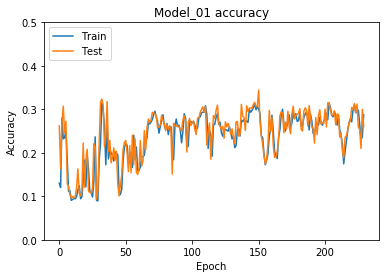

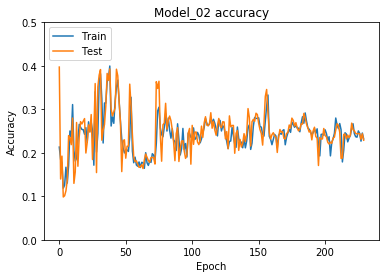

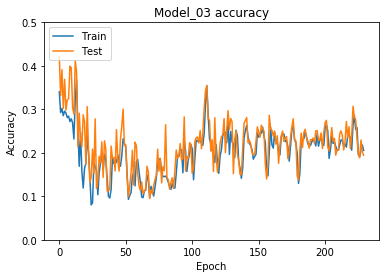

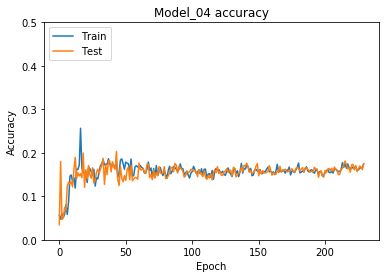

In [27]:
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_01,nparray_accuracy_Test_01,"01")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_02,nparray_accuracy_Test_02,"02")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_03,nparray_accuracy_Test_03,"03")
plot_accuracy_Train_vs_Test(nparray_accuracy_Train_04,nparray_accuracy_Test_04,"04")

In [28]:
# overlay loss train and test
def plot_loss_Train_vs_Test(nparray_loss_Train,nparray_loss_Test,modelName):
    plt.plot(nparray_loss_Train)
    plt.plot(nparray_loss_Test)
    plt.title('Model_'+modelName+' loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc="upper left")
    plt.show()
# done function

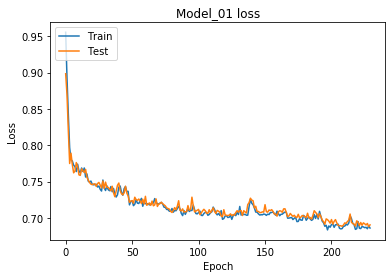

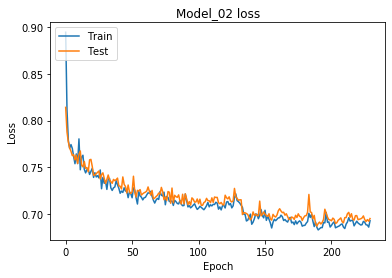

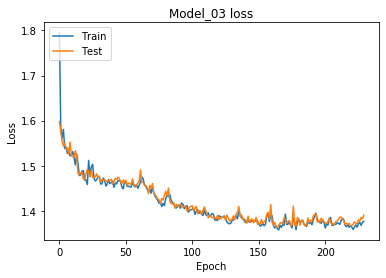

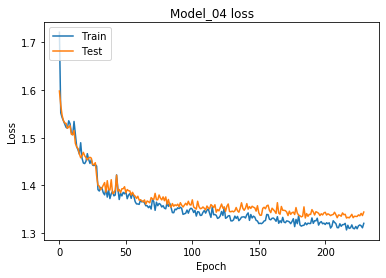

In [29]:
plot_loss_Train_vs_Test(nparray_loss_Train_01,nparray_loss_Test_01,"01")
plot_loss_Train_vs_Test(nparray_loss_Train_02,nparray_loss_Test_02,"02")
plot_loss_Train_vs_Test(nparray_loss_Train_03,nparray_loss_Test_03,"03")
plot_loss_Train_vs_Test(nparray_loss_Train_04,nparray_loss_Test_04,"04")

In [30]:
# overlay train and test we expect train to be better than test 
def plot_train_test(nparray_counterLineTrain,nparray_counterLineTest,modelName):
    plt.hist(nparray_counterLineTrain,bins=range(0,22),alpha=1,color="blue",histtype='step')
    plt.hist(nparray_counterLineTest,bins=range(0,22),alpha=1,color="red",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Nr of hits corectly predicted')
    plt.title('Model_'+modelName)
    plt.legend(["Train","Test"],loc='upper left')
    #plt.ylim(bottom=0,top=250)
    plt.show()
# done function

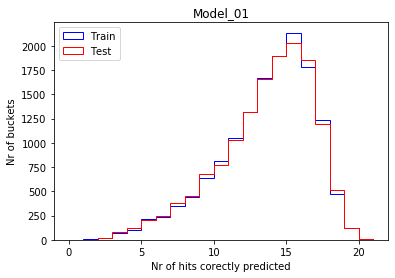

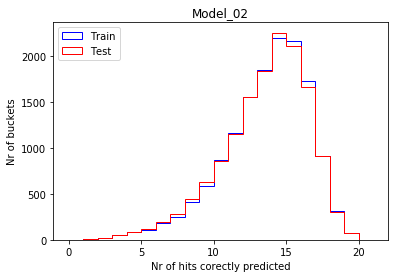

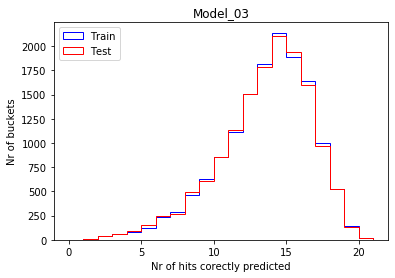

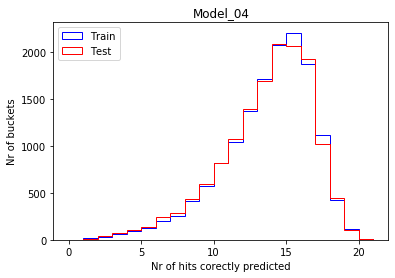

In [31]:
plot_train_test(nparray_counterLine_01_Train,nparray_counterLine_01_Test,"01")
plot_train_test(nparray_counterLine_02_Train,nparray_counterLine_02_Test,"02")
plot_train_test(nparray_counterLine_03_Train,nparray_counterLine_03_Test,"03")
plot_train_test(nparray_counterLine_04_Train,nparray_counterLine_04_Test,"04")


In [32]:
# Overlay several models for accuracy train
def plot_accuracy_train_several_models():
    plt.plot(nparray_accuracy_Train_01)
    plt.plot(nparray_accuracy_Train_02)
    plt.plot(nparray_accuracy_Train_03)
    plt.plot(nparray_accuracy_Train_04)
    plt.title('accuracy Train')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04"], loc='best')
    plt.ylim(bottom=0)
    plt.show()
    
# done function

# Overlay several models for accuracy test
def plot_accuracy_test_several_models():
    plt.plot(nparray_accuracy_Test_01)
    plt.plot(nparray_accuracy_Test_02)
    plt.plot(nparray_accuracy_Test_03)
    plt.plot(nparray_accuracy_Test_04)
    plt.title('accuracy Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04"], loc='best')
    plt.ylim(bottom=0)
    plt.show()

# done function 

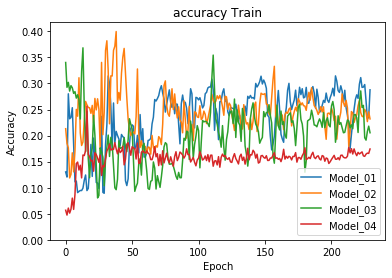

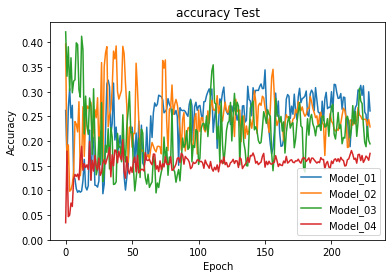

In [33]:
plot_accuracy_train_several_models()
plot_accuracy_test_several_models()

In [34]:
# Overlay several models for loss train
def plot_loss_train_several_models():
    plt.plot(nparray_loss_Train_01)
    plt.plot(nparray_loss_Train_02)
    plt.plot(nparray_loss_Train_03)
    plt.plot(nparray_loss_Train_04)
    plt.title('loss Train')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04"], loc='best')
    plt.ylim(bottom=0)
    plt.show()
    
# done function

# Overlay several models for accuracy test
def plot_loss_test_several_models():
    plt.plot(nparray_loss_Test_01)
    plt.plot(nparray_loss_Test_02)
    plt.plot(nparray_loss_Test_03)
    plt.plot(nparray_loss_Test_04)
    plt.title('loss Test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Model_01',"Model_02","Model_03","Model_04"], loc='best')
    plt.ylim(bottom=0)
    plt.show()

# done function 

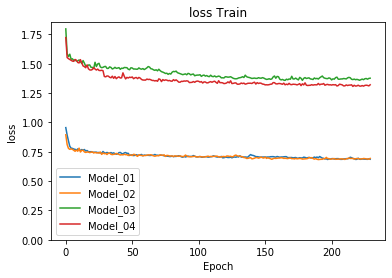

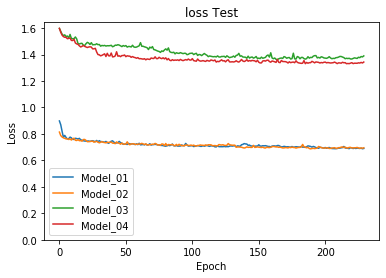

In [35]:
plot_loss_train_several_models()
plot_loss_test_several_models()

In [40]:
# overlay several models for correctly predicted 
def plot_correctly_predicted_Train():
    plt.hist(nparray_counterLine_01_Train,bins=range(0,22),alpha=1,color="blue",histtype='step')
    plt.hist(nparray_counterLine_02_Train,bins=range(0,22),alpha=1,color="red",histtype='step')
    plt.hist(nparray_counterLine_03_Train,bins=range(0,22),alpha=1,color="green",histtype='step')
    plt.hist(nparray_counterLine_04_Train,bins=range(0,22),alpha=1,color="magenta",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Nr of hits corectly predicted')
    plt.title('Train')
    plt.legend(["Model_01","Model_02","Model_03","Model_04"],loc='upper left')
    #plt.ylim(bottom=0,top=100)
    plt.show()
# done function

# overlay several models for correctly predicted 
def plot_correctly_predicted_Test():
    plt.hist(nparray_counterLine_01_Test,bins=range(0,22),alpha=1,color="blue",histtype='step')
    plt.hist(nparray_counterLine_02_Test,bins=range(0,22),alpha=1,color="red",histtype='step')
    plt.hist(nparray_counterLine_03_Test,bins=range(0,22),alpha=1,color="green",histtype='step')
    plt.hist(nparray_counterLine_04_Test,bins=range(0,22),alpha=1,color="magenta",histtype='step')
    plt.ylabel('Nr of buckets')
    plt.xlabel('Nr of hits corectly predicted')
    plt.title('Test')
    plt.legend(["Model_01","Model_02","Model_03","Model_04"],loc='upper left')
    #plt.ylim(bottom=0,top=100)
    plt.show()
# done function

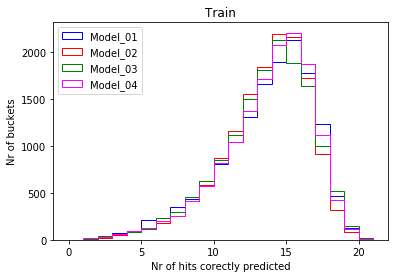

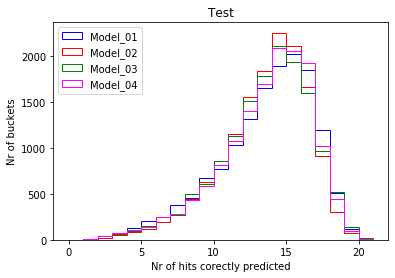

In [41]:
plot_correctly_predicted_Train()
plot_correctly_predicted_Test()